<img src="logo-olx.png">

In [270]:
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import kmapper as km
from kmapper import jupyter # Creates custom CSS full-size Jupyter screen
from sklearn import preprocessing
import datetime
import warnings
warnings.filterwarnings('ignore')

### Ads

<img src="properati.png">

## Datos abiertos

https://www.properati.com.ar/data/

In [271]:
ads = pd.read_csv('ads_cba.csv')

In [272]:
ads.head()

,id,start_date,end_date,lat,lon,country,l1,l2,l3,l4,...,surface_covered,rooms,bathrooms,bedrooms,currency,operation,price,description,price_m2,freshness
0,3687940,2019-05-25 00:00:00.000000000,2262-04-11 23:47:16.854775807,-31.418149,-64.502799,Argentina,Argentina,Córdoba,Villa Carlos Paz,NaN,...,68,2,NaN,NaN,USD,Venta,117000,Hermoso Departamento de Un Dormitorio Más Coch...,1720.588235,67 days 00:00:00.000000000
1,3793552,2019-07-07 00:00:00.000000000,2262-04-11 23:47:16.854775807,-31.411177,-64.162837,Argentina,Argentina,Córdoba,Córdoba,NaN,...,60,4,2.0,2.0,USD,Venta,145000,ORONEL FAY INMOBILIARIA - VENDE hermoso dpto. ...,2320.000000,24 days 00:00:00.000000000
2,3793735,2019-07-07 00:00:00.000000000,2262-04-11 23:47:16.854775807,-31.277777,-64.167701,Argentina,Argentina,Córdoba,Estación Juárez Celman,NaN,...,175,5,NaN,NaN,ARS,Venta,2200000,Vendo Galpón en Villa Los LLanos-Estación Juár...,6646.525680,24 days 00:00:00.000000000
3,3793751,2019-07-07 00:00:00.000000000,2262-04-11 23:47:16.854775807,-30.925351,-64.501320,Argentina,Argentina,Córdoba,Los Cocos,NaN,...,10,1,NaN,NaN,USD,Venta,14500,Vendo Hermosos Lotes Planos-Listos para constr...,47.540984,24 days 00:00:00.000000000
4,3793750,2019-07-07 00:00:00.000000000,2262-04-11 23:47:16.854775807,-31.438200,-64.116882,Argentina,Argentina,Córdoba,Córdoba,NaN,...,185,6,NaN,NaN,ARS,Venta,2450000,Vendo amplia Casa mas Departamento en Barrio P...,9158.878505,24 days 00:00:00.000000000


In [273]:
ads.columns

Index(['id', 'start_date', 'end_date', 'lat', 'lon', 'country', 'l1', 'l2',
       'l3', 'l4', 'l5', 'l6', 'seller_id', 'seller_name', 'stratum',
       'property_type', 'surface_total', 'surface_covered', 'rooms',
       'bathrooms', 'bedrooms', 'currency', 'operation', 'price',
       'description', 'price_m2', 'freshness'],
      dtype='object')

### Preprocessing

In [561]:
categorical_columns = [ 'operation', 'property_type', 'currency']
numerical_columns = ['lat', 'lon', 'price', 'rooms', 'surface_covered', 'surface_total']
date_columns = ['start_date', 'end_date']

# Select columns
df = ads[~ads['l3'].isna()][categorical_columns + numerical_columns + date_columns ]

# Vectorize ads
labelencoder = LabelEncoder()
df['encoded_start_date'] = labelencoder.fit_transform(df['start_date'])
df = df.drop(['start_date', 'end_date'], axis = 1)
df = pd.get_dummies(df, columns = categorical_columns)

#Drop null data
df = df.dropna()
index = df.index

#Scale data
df = StandardScaler().fit_transform(df.values)

In [562]:
df.shape

(2235, 22)

### Visualizations

Scatter plot visualization

In [563]:
def visualize_scatter(data_2d, column, figsize=(20,20)):

    plt.figure(figsize=figsize)
    
    # Set labels
    labels = ads.loc[index][column]
    label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
    id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}
    label_ids = np.array([label_to_id_dict[x] for x in labels])

    nb_classes = len(np.unique(label_ids))
    
    for label_id in np.unique(label_ids):
        plt.scatter(data_2d[np.where(label_ids == label_id), 0],
                    data_2d[np.where(label_ids == label_id), 1],
                    marker='o',
                    color= plt.cm.gist_ncar(label_id / float(nb_classes)),
                    linewidth='1',
                    alpha=0.4,
                    label=id_to_label_dict[label_id])
        ax = plt.gca()
    plt.legend(loc='right')
    
    ax.set_facecolor('xkcd:black')

In [564]:
tsne = TSNE(n_components=2, perplexity=40.0)
tsne_result = tsne.fit_transform(df)

In [565]:
reducer = umap.UMAP(n_neighbors = 40)
embedding = reducer.fit_transform(df)

In [566]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)

## Departmental regions

#### PCA

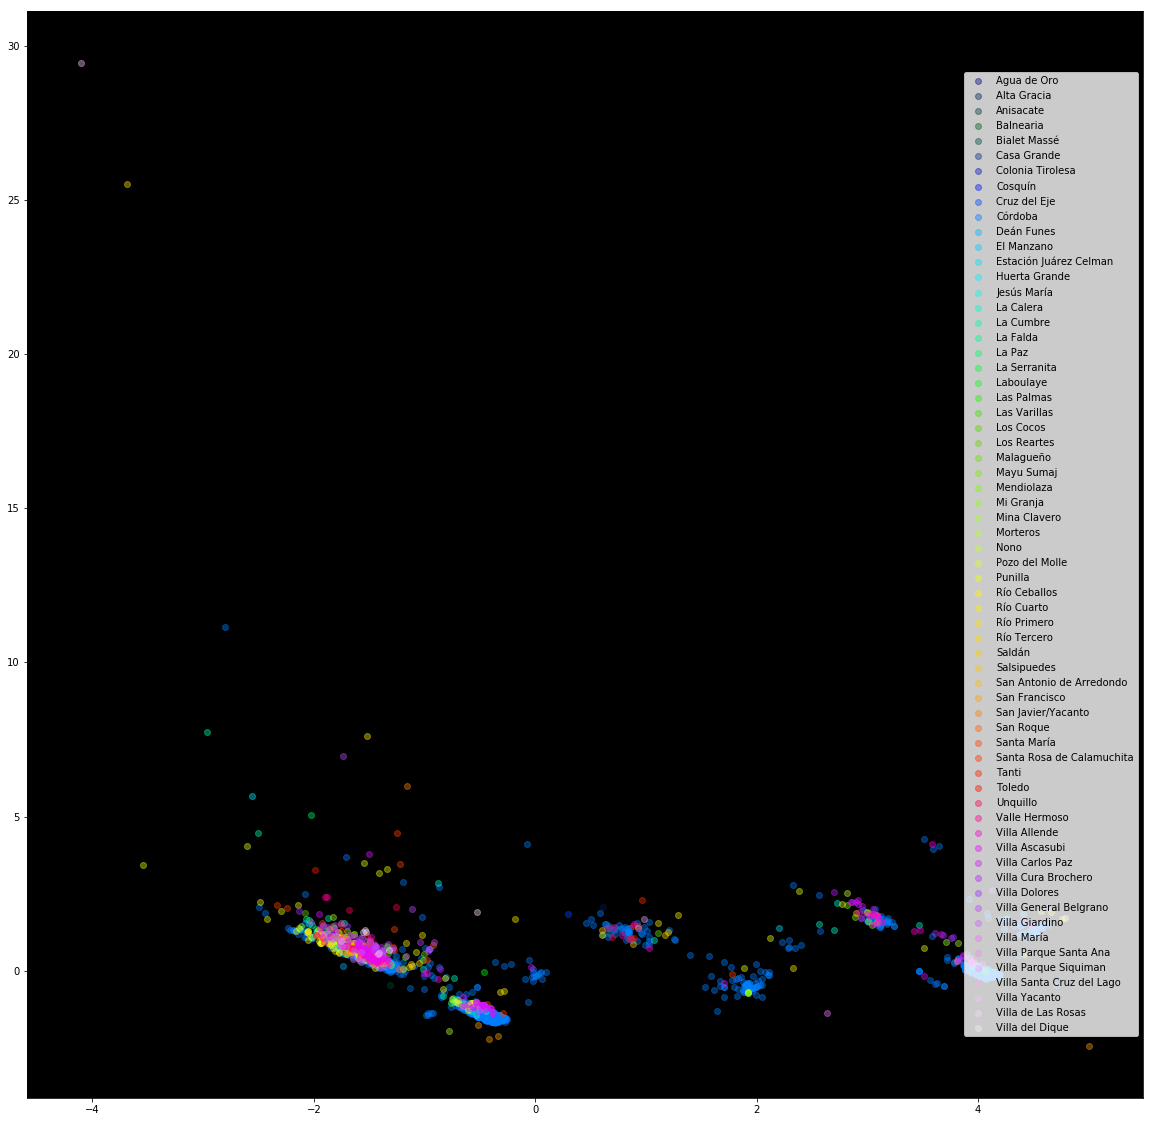

In [567]:
visualize_scatter(principalComponents, 'l3')

#### t-SNE

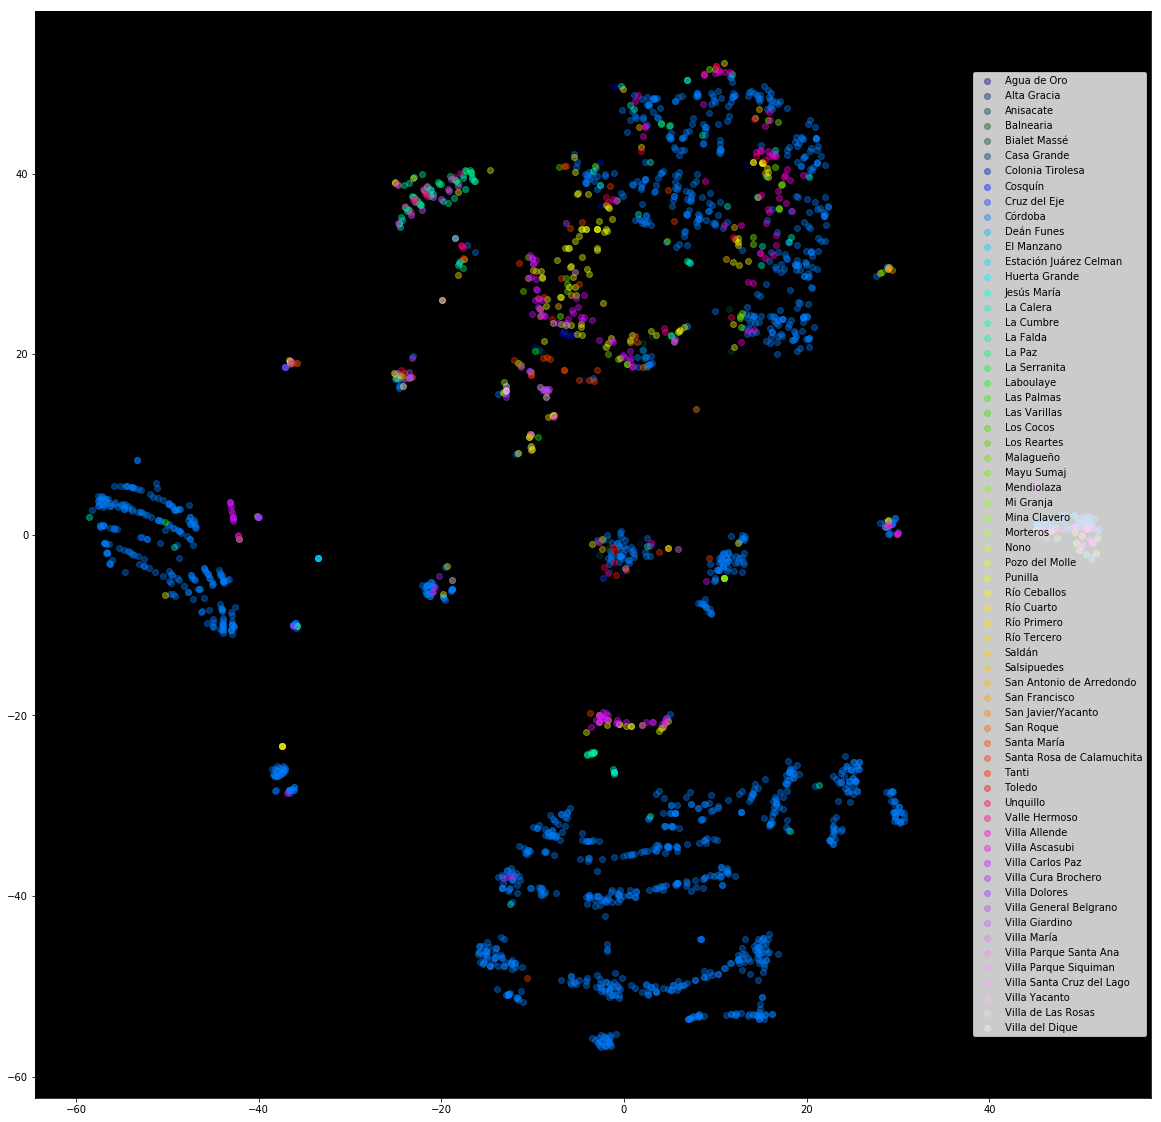

In [568]:
visualize_scatter(tsne_result, 'l3')

### UMAP

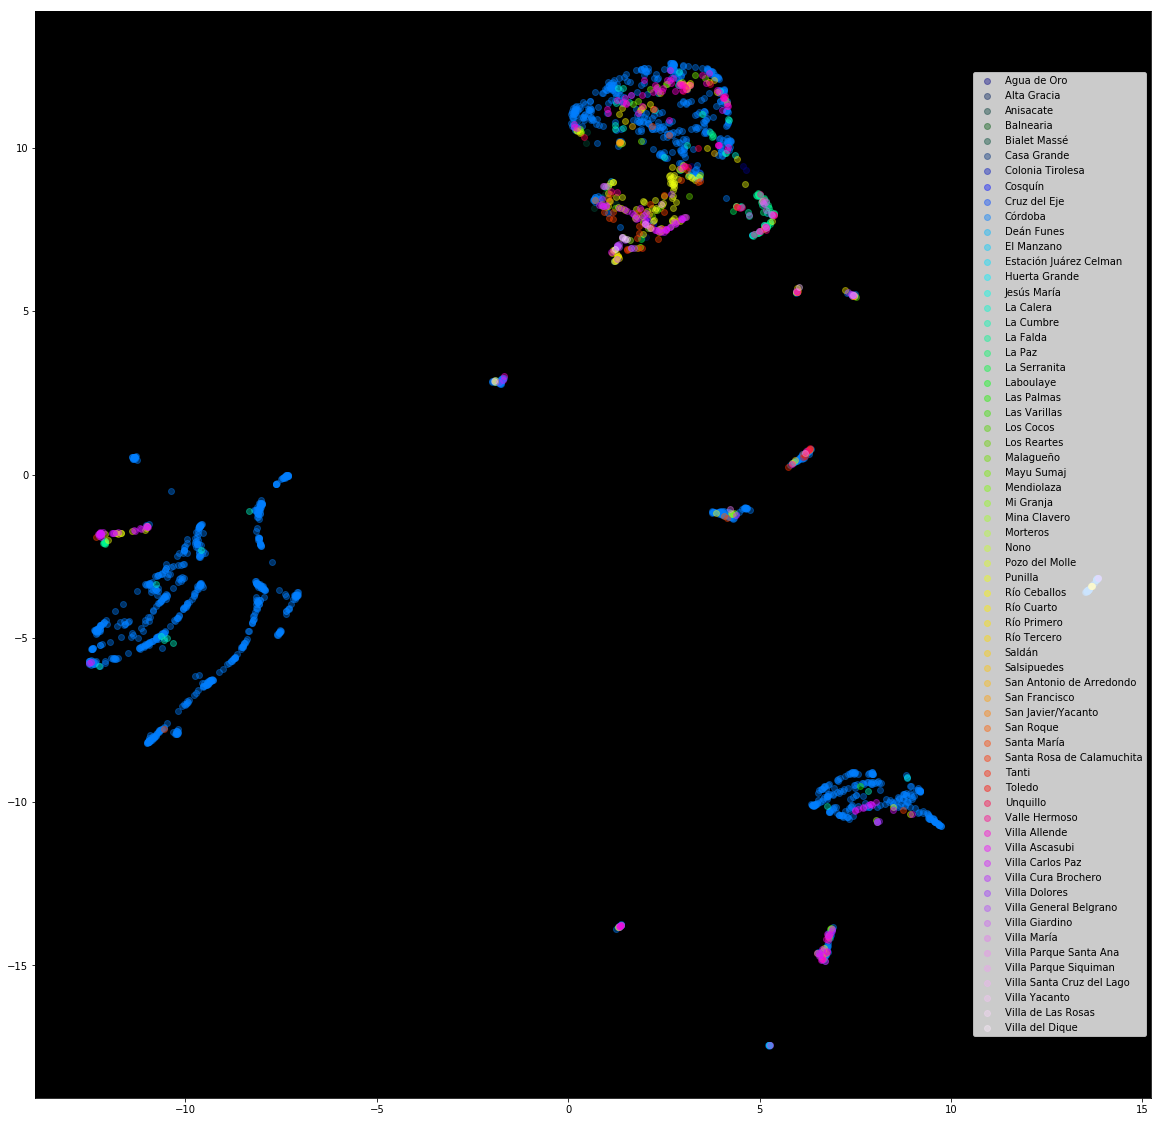

In [569]:
visualize_scatter(embedding, 'l3')

#### Property type

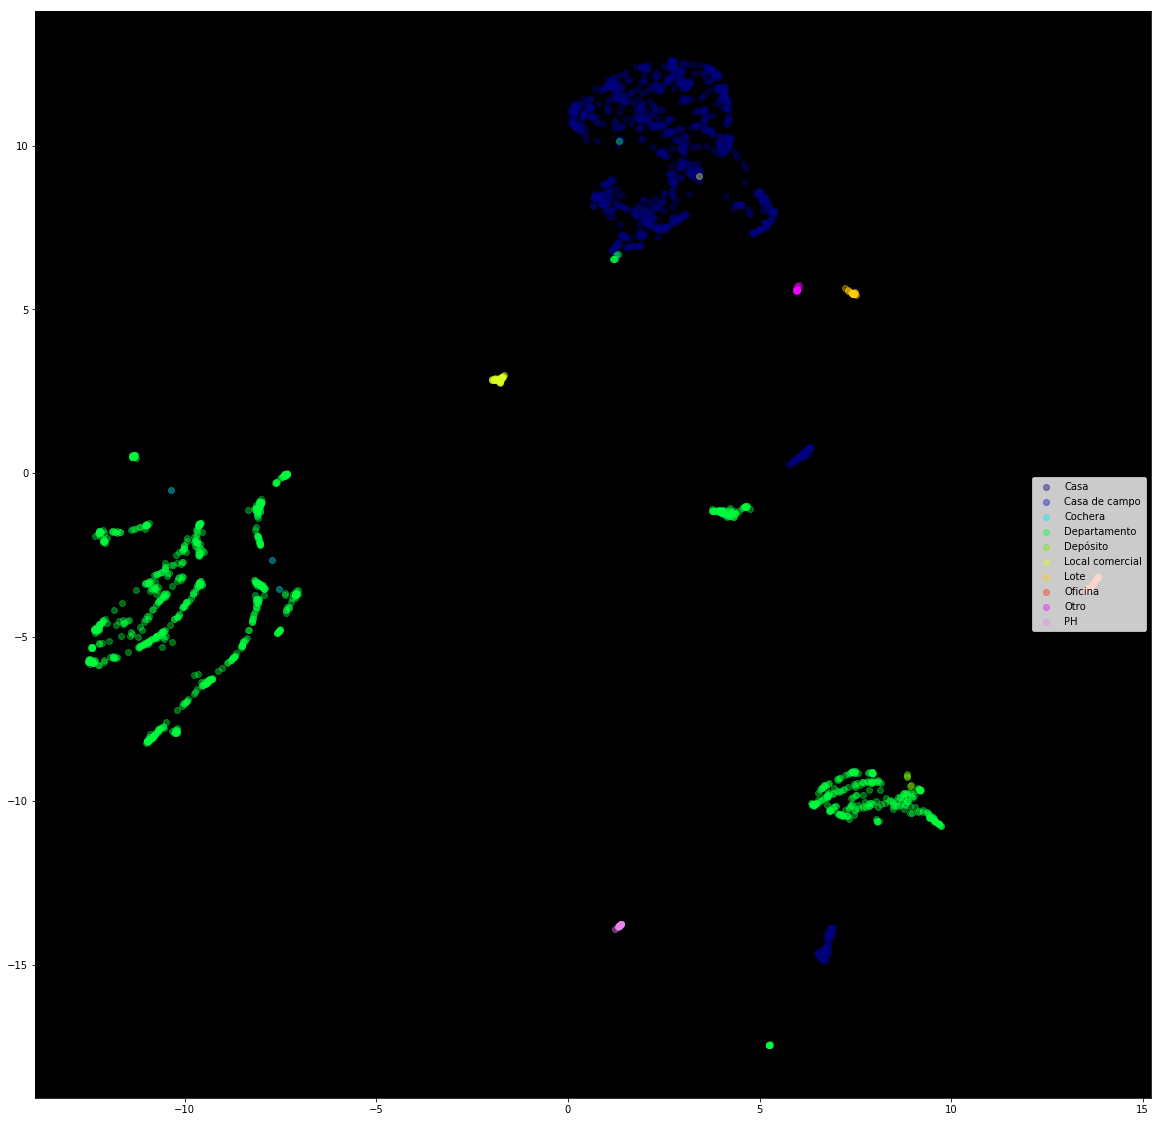

In [570]:
visualize_scatter(embedding, 'property_type')

#### Operation

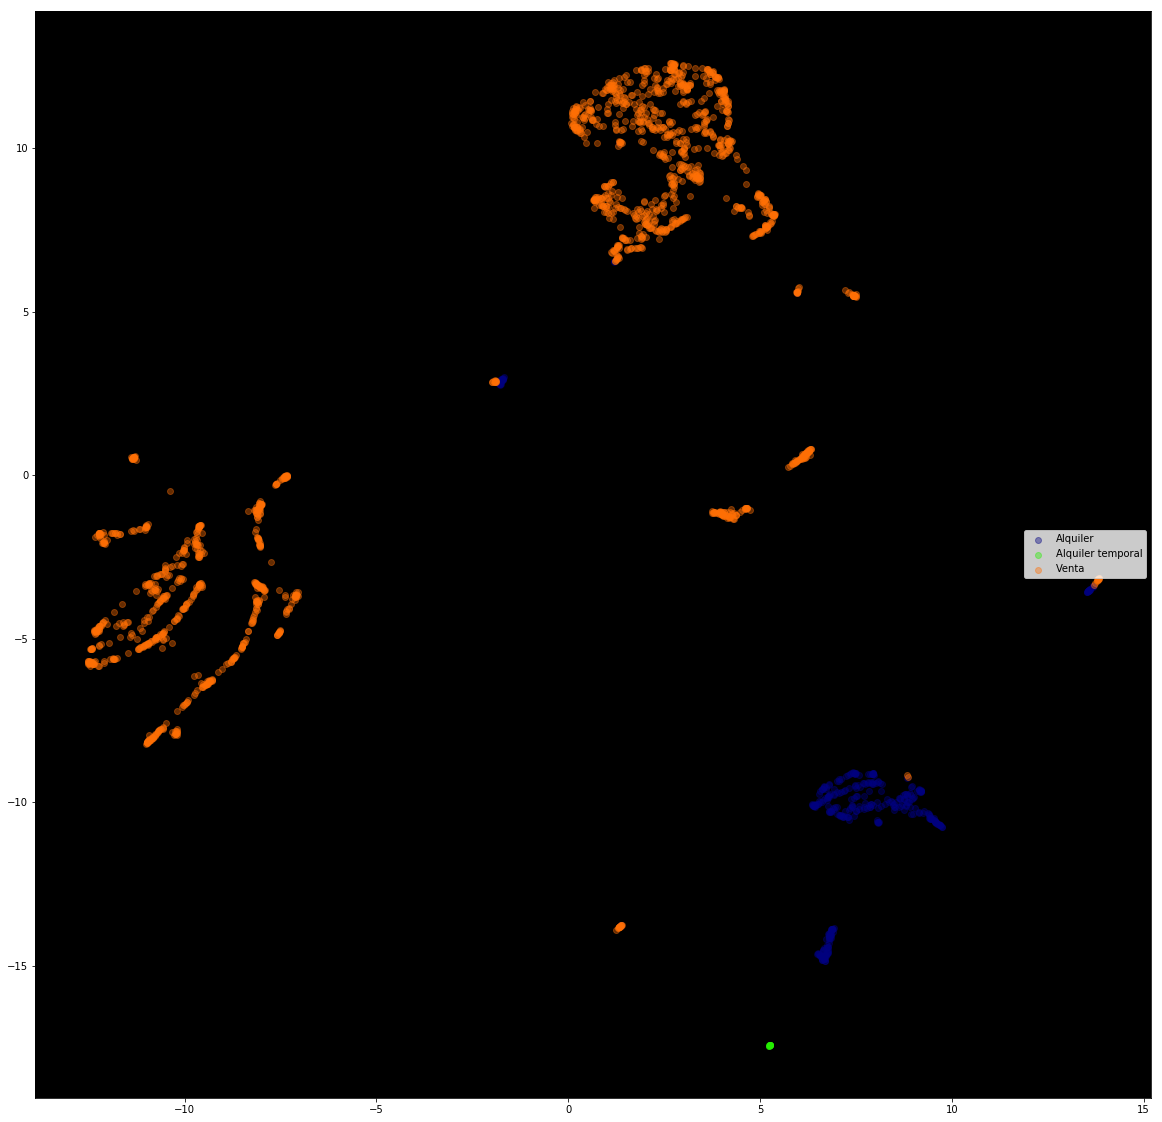

In [571]:
visualize_scatter(embedding, 'operation')

#### Currency

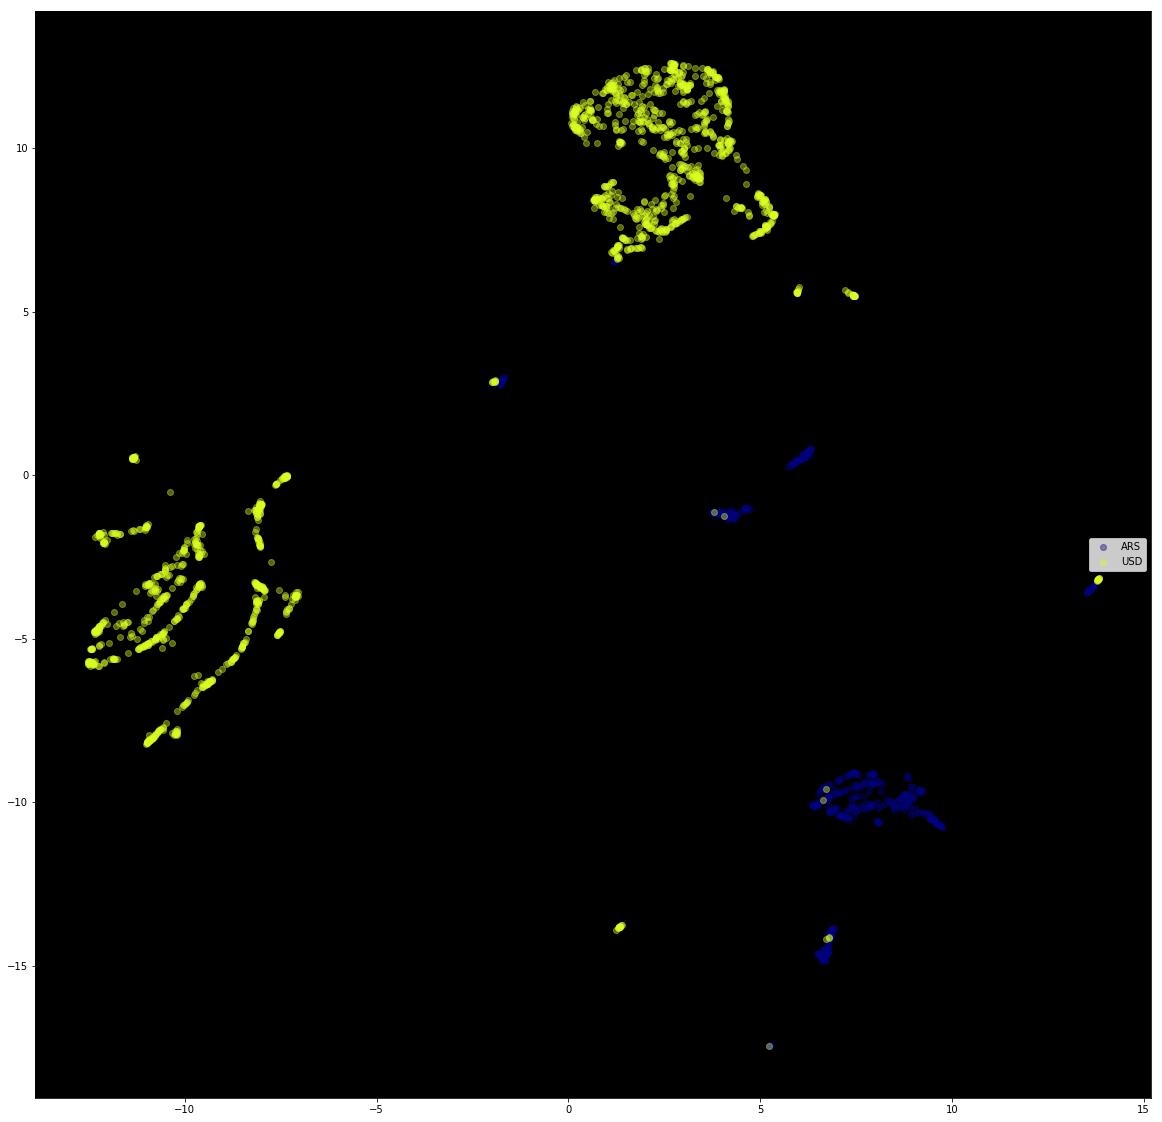

In [572]:
visualize_scatter(embedding, 'currency')

#### Number of rooms

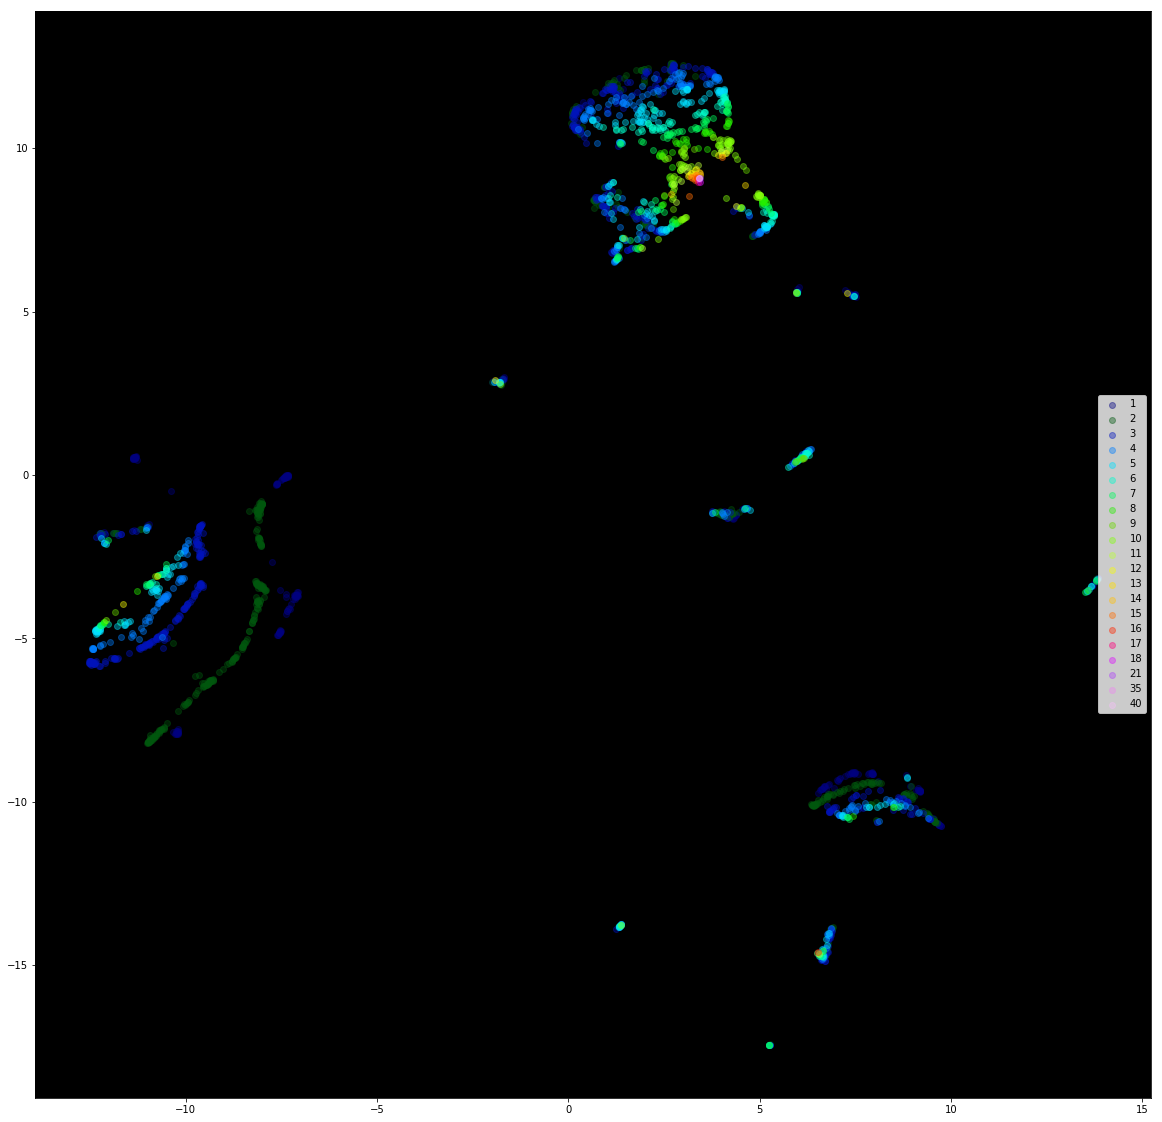

In [573]:
visualize_scatter(embedding, 'rooms')

In [574]:
embedding.shape

(2235, 2)

In [575]:
emb_concat = pd.concat([pd.DataFrame(embedding),ads.loc[index][['surface_total',  'price', 'lat', 'lon']].reset_index()], axis = 1)

#### Price

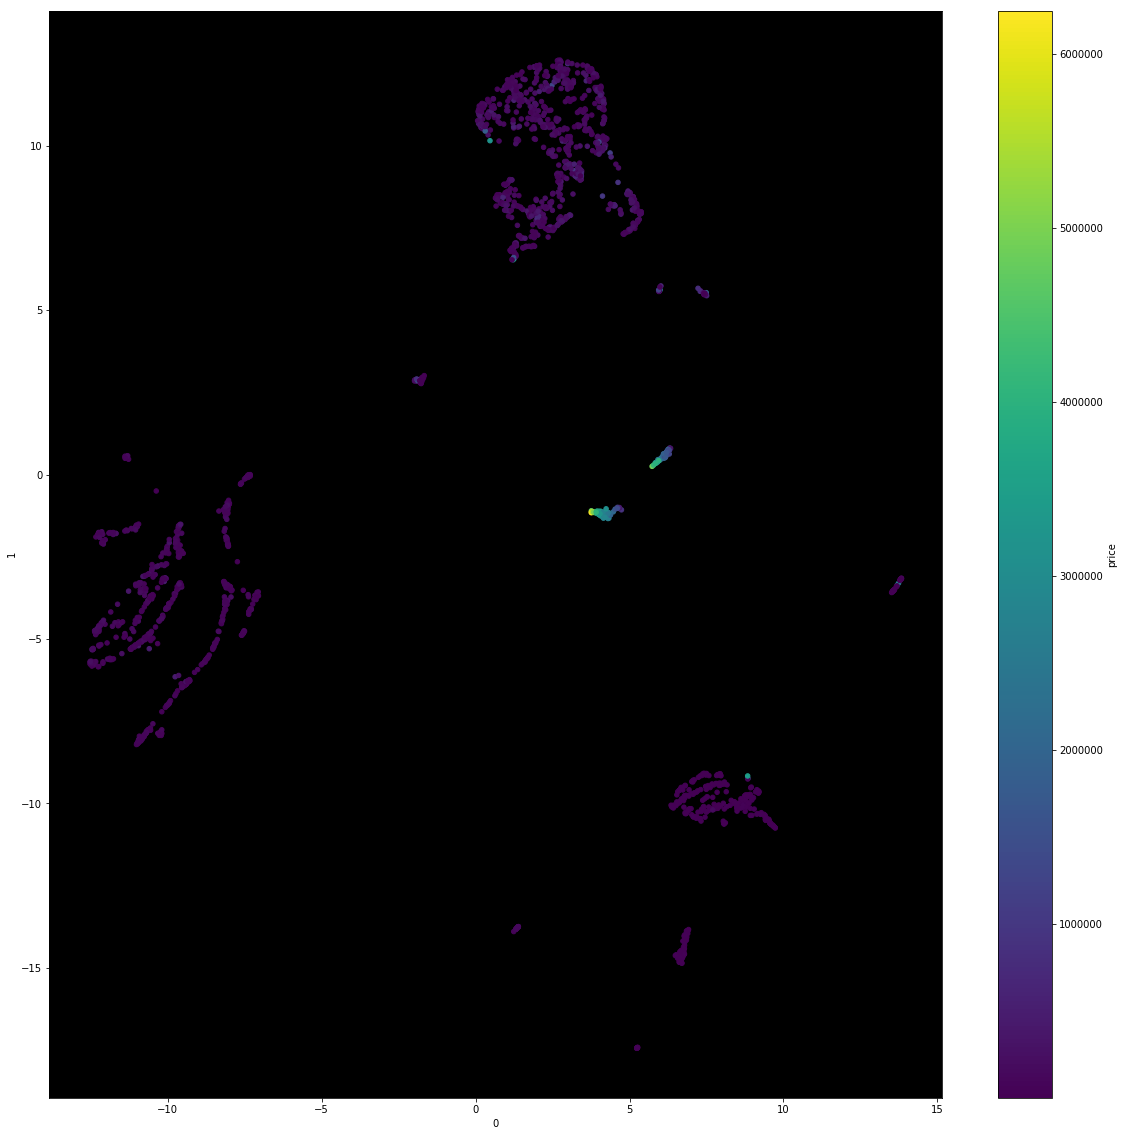

In [576]:
plt.figure(figsize=(20,20))
ax = plt.gca()
emb_concat.plot.scatter(x = 0, y = 1, c = 'price', colormap='viridis', ax=ax)
ax.set_facecolor('xkcd:black')

#### Total surface

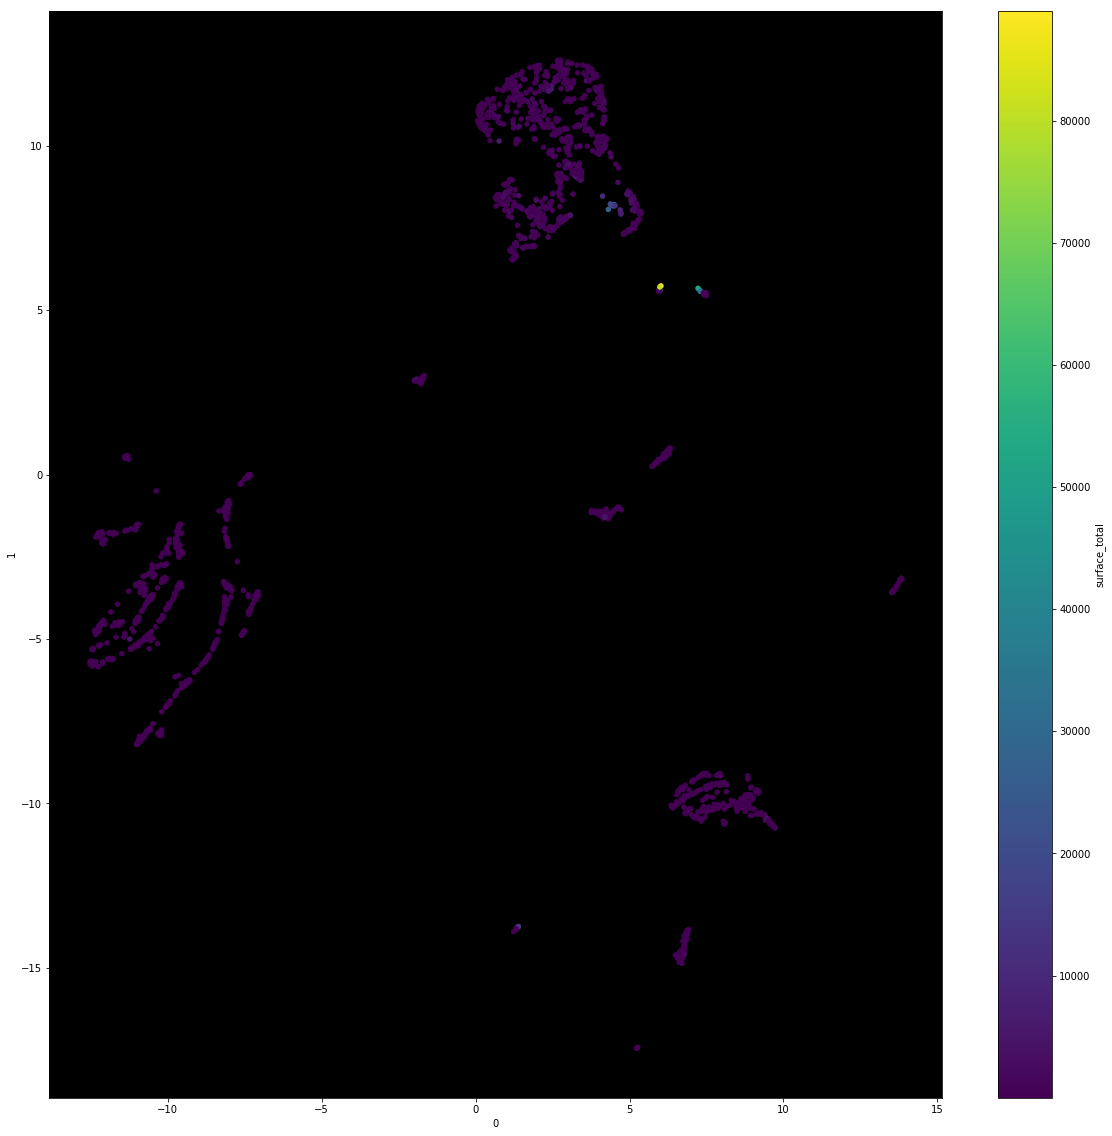

In [577]:
plt.figure(figsize=(20,20))
ax = plt.gca()
emb_concat.plot.scatter(x = 0, y = 1, c = 'surface_total', colormap='viridis', ax=ax)
ax.set_facecolor('xkcd:black')

## Mapper

In [594]:
# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
lens = embedding

# Create dictionary called 'graph' with nodes, edges and meta-information
simplicial_complex = mapper.map(lens, df, nr_cubes=100, remove_duplicate_nodes = True, clusterer = sklearn.cluster.DBSCAN(metric="cosine"))

# Visualize it

path_html="ads_clustering.html"
html = mapper.visualize(simplicial_complex, path_html=path_html,
                 title="Ads_clustering")

# Inline display
jupyter.display(path_html=path_html)


KeplerMapper()
Mapping on data shaped (2235, 22) using lens shaped (2235, 2)

Creating 10000 hypercubes.
No duplicate nodes found to remove.


Created 135 edges and 217 nodes in 0:00:00.721045.
Wrote visualization to: ads_clustering.html


In [595]:
def clusterization(simplicial_complex, ads):
    dict_nodes = simplicial_complex["nodes"]
    dict_links = simplicial_complex['links']
    clusterization = pd.DataFrame(simplicial_complex["nodes"].items(), columns = ['vertex', 'item_list'])
    cluster_df = clusterization.item_list.apply(pd.Series) \
        .merge(clusterization, right_index = True, left_index = True) \
        .drop(["item_list"], axis = 1) \
        .melt(id_vars = ['vertex'], value_name = "ad_position") \
        .dropna() \
        .drop('variable', axis = 1) \
        .sort_values(by = ['vertex'])
    cluster_df['ad_position'] = cluster_df['ad_position'].astype(int)
    cluster_df['ad_id'] = list(ads.iloc[cluster_df['ad_position']]['id'])
    clustered_ads = pd.merge(ads, cluster_df, left_on = 'id', right_on = 'ad_id')#, how = 'left')
    clustered_ads = clustered_ads.sort_values(by = 'vertex')
    return clustered_ads

In [596]:
clustered_ads = clusterization(simplicial_complex, ads.iloc[index])[ categorical_columns + numerical_columns + date_columns + ['l3', 'l4', 'vertex']]

In [597]:
len(simplicial_complex['nodes'].keys())

217

In [598]:
clustered_ads[categorical_columns + numerical_columns + date_columns + ['l3', 'l4', 'vertex']]

,operation,property_type,currency,lat,lon,price,rooms,surface_covered,surface_total,start_date,end_date,l3,l4,vertex
1761,Venta,Departamento,USD,-31.354910,-64.313048,35000,3,65,65,2019-07-22 00:00:00.000000000,2262-04-11 23:47:16.854775807,La Calera,NaN,cube0_cluster0
1009,Venta,Departamento,USD,-31.402049,-64.218159,39900,3,45,45,2019-07-29 00:00:00.000000000,2262-04-11 23:47:16.854775807,Córdoba,NaN,cube0_cluster0
1753,Venta,Departamento,USD,-31.358998,-64.211661,128000,3,85,85,2019-07-22 00:00:00.000000000,2262-04-11 23:47:16.854775807,Córdoba,Nueva Córdoba,cube0_cluster0
1045,Venta,Departamento,USD,-31.422180,-64.181816,155000,3,60,75,2019-07-29 00:00:00.000000000,2262-04-11 23:47:16.854775807,Córdoba,Nueva Córdoba,cube0_cluster0
1210,Venta,Departamento,USD,-31.419915,-64.190025,128000,3,62,62,2019-07-24 00:00:00.000000000,2262-04-11 23:47:16.854775807,Córdoba,Centro,cube0_cluster0
1032,Venta,Departamento,USD,-31.400649,-64.225382,103000,3,72,94,2019-07-29 00:00:00.000000000,2262-04-11 23:47:16.854775807,Córdoba,NaN,cube0_cluster0
1207,Venta,Departamento,USD,-31.429637,-64.192692,116000,3,66,66,2019-07-24 00:00:00.000000000,2262-04-11 23:47:16.854775807,Córdoba,Nueva Córdoba,cube0_cluster0
1223,Venta,Departamento,USD,-31.408555,-64.218828,50000,3,35,35,2019-07-24 00:00:00.000000000,2262-04-11 23:47:16.854775807,Córdoba,Nueva Córdoba,cube0_cluster0
1027,Venta,Departamento,USD,-31.411187,-64.224621,49999,3,41,41,2019-07-29 00:00:00.000000000,2262-04-11 23:47:16.854775807,Córdoba,NaN,cube0_cluster0
1226,Venta,Departamento,USD,-31.416239,-64.225028,35000,3,40,40,2019-07-24 00:00:00.000000000,2262-04-11 23:47:16.854775807,Córdoba,NaN,cube0_cluster0


In [583]:
cluster = clustered_ads[clustered_ads['vertex'] == 'cube108_cluster0']

In [584]:
cluster

,operation,property_type,currency,lat,lon,price,rooms,surface_covered,surface_total,start_date,end_date,l3,l4,vertex
